# 한국어 언어 모델 학습 및 다중 과제 튜닝

## 1. BERT 언어 모델

### 1. BERT 모델 소개

* BERT 모델 전까지 딥러닝 알고리즘 발전 과정

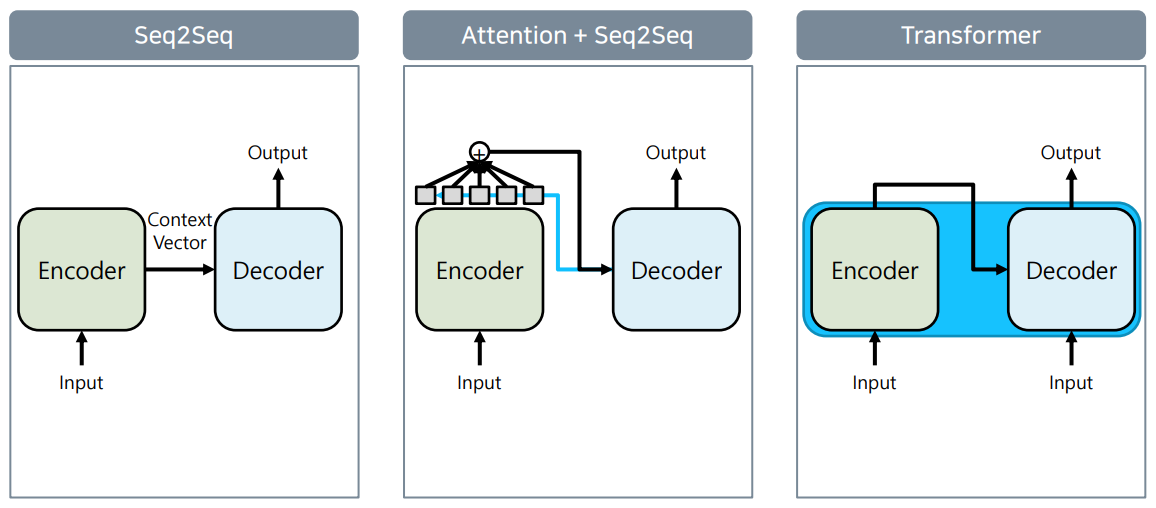

* 이미지 Autoencoder model
  * 본인 스스로를 가장 잘 표현할 수 있게 학습된 모델
  * encoder와 decoder로 구성되어 있음
  * encoder : 입력된 이미지를 압축된 형태로 표현
  * decoder : 원본을 그대로 복원

* BERT
  * transformer를 사용한 모델
  * 입력된 정보를 다시 representation하는 것이 목적
  * masked 기술을 사용함
    * 입력된 이미지 중간중간에 masking을 함(원본 이미지 복원이 더 어려워 짐)
  * 입력된 이미지를 그대로 출력하는 것이 아니라, masking을 함으로써 더 어렵게 문제를 만들어 해결하여 언어를 더 확실하게 학습하는 방법

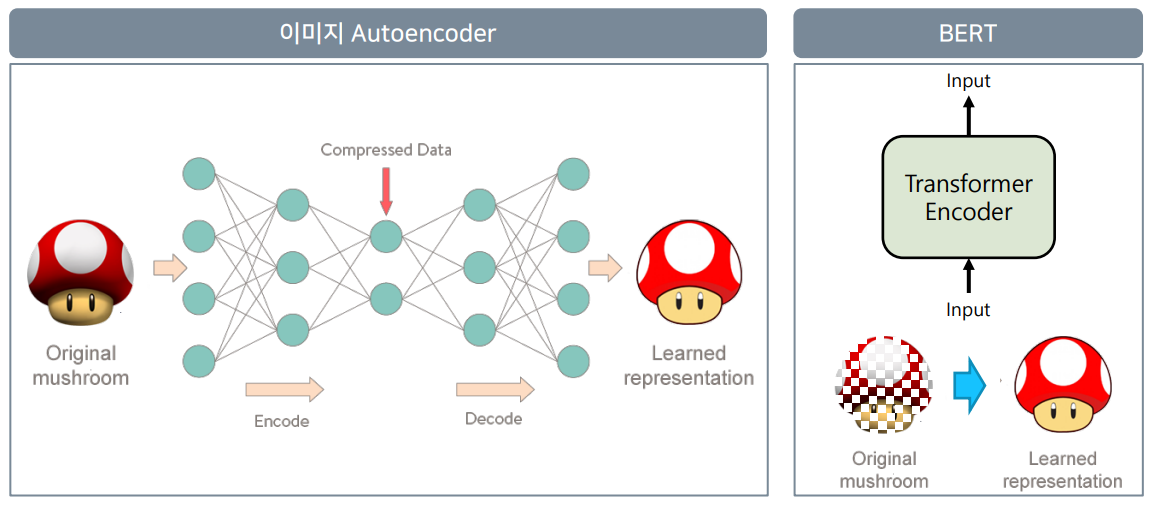

* GPT-1
  * Transformer Decoder만 사용함

* BERT
  * mask된 자연어를 원본 자연어로 복원하는 과정으로 학습함

* GPT-2
  * 원본이미지를 특정한 sequence를 가지고 자른 후, 그 다음(next, 잘린부분)을 예측하도록 학습함

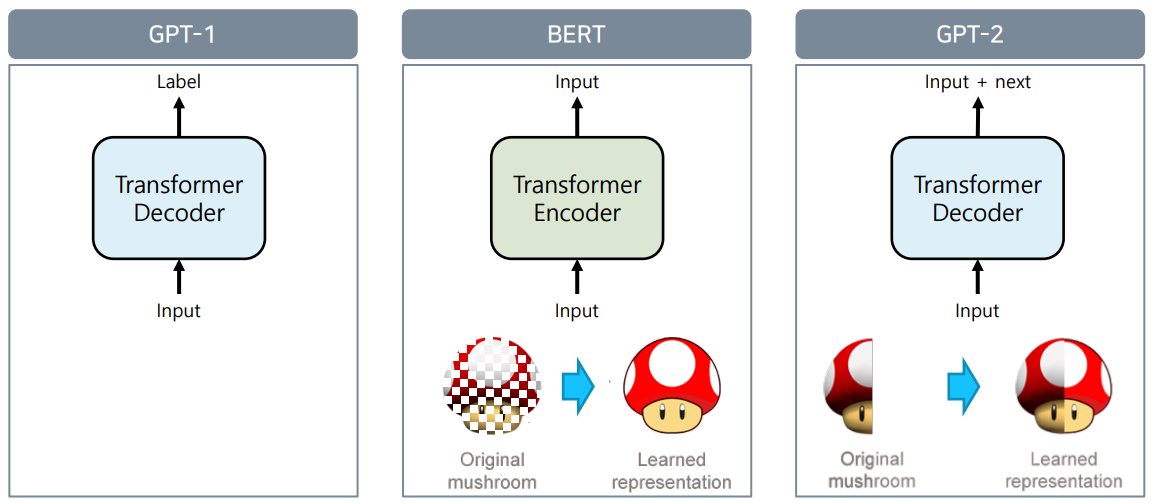

* BERT
  * input layer : sentence 2개를 입력으로 받음
    * sentence1 : seperater token([sep])을 부착하고 sentence2가 들어감
  * Transformer layer : 12개로 구성되어 있음
    * 12개의 layer(Transformer)가 all-to-all로 연결되어 있음
      * [CLS] token의 출력 vector가 sentence1과 sentence2를 포괄하고 있는 어떤 vector로 녹아든다고 가정함
      * [CLS] token이 sentence1과 sentence2를 잘 표현하기 위해 [CLS] token 위에 classification을 부착해서 pretraining을 진행함
    * 출력으로 만들어짐
    * class label([CLS]) : sentence1과 sentence2가 next sentence관계인지, 혹은 전혀 상관없는 sentence로 만들어져있는지, 이러한 class를 분류하기 위해 학습함

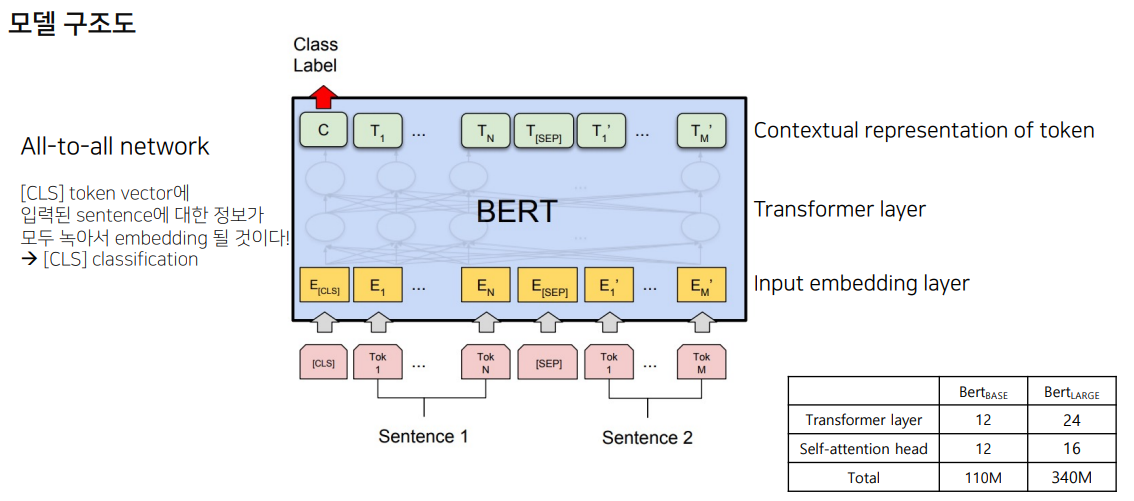

* BERT는 corpus 양이 많음

* 학습 코퍼스 데이터
  * BooksCorpus (800M words)
  * English Wikipedia (2,500M words without lists, tables and headers)
  * 30,000 token vocabulary

* 데이터의 tokenizing
  * WordPiece tokenizer를 사용함
    * 빈도수 기반으로 tokenizing을 함
  * 첫 번째 문장이 선택된 후 두 번째 문장은 next sentence로 선택하거나 random chosen sentence를 50% 확률로 선택하여 들어가게 됨
  * He likes playing -> He likes play ##ing
  * 입력 문장을 tokinizing하고, 그 token들로 'token sequence'를 만들어 학습에 사용함
  * 2개의 token sequence가 학습에 사용됨
  * 입력되는 token을 아래 그림과 같이 만들어줌

  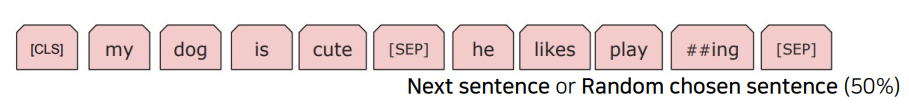

* Masked Language Model
   * 입력된 token 완성 후 masking 과정을 거침
   * special token([CLS], [SEP])을 제외하고 나머지 token 중에서 15% 확률로 random으로 선택함
   * 15% 확률로 선택된 token은 아래 3가지 방법중 하나를 수행함
    * 80%(15% 중에)는 masked token으로 replace함
    * 나머지 20%(15% 중에)중 일부는 vocab 내에서 존재하는 다른 token으로 replace하고, 일부는 replace하지 않음

* 최종적으로 mask와 WordPiece tokenizing이 적용된 input data가 입력으로 들어감

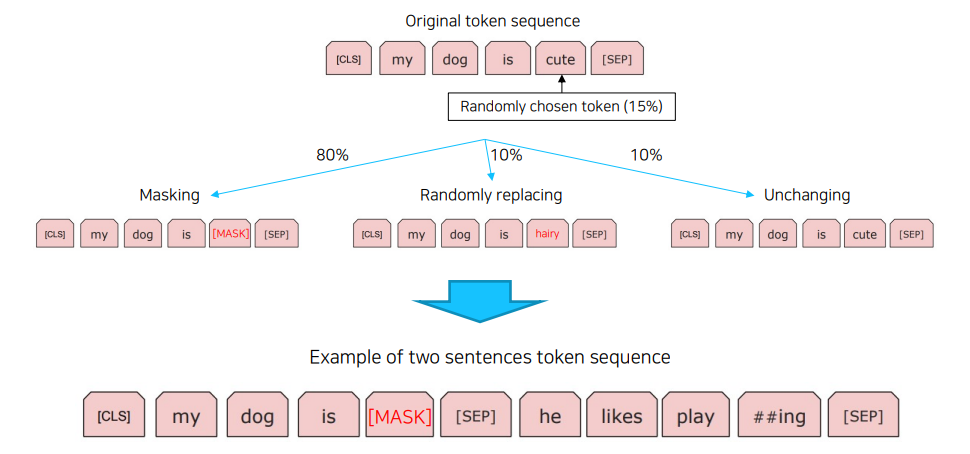

* NLP 실험
  * GLUE datasets
    * MNLI : Multi-Genre Natural Language Inference
      * 두 문장의 관계 분류를 위한 데이터셋
    * QQP : Quora Question Pairs
      * 두 질문이 의미상 같은지 다른지 분류를 위한 데이터셋
    * QNLI : Question Natural Language Inference
      * 질의응답 데이터셋
    * SST-2 : The Stanfored Sentiment Treebank
      * 영화 리뷰 문장에 관한 감성 분석을 위한 데이터셋
    * CoLA : The Corpus of Linguistic Acceptability
      * 문법적으로 맞는 문장인지 틀린 문장인지 분류를 위한 데이터셋
    * STS-B : The Semantic Textural Similarity Benchmark
      * 뉴스 헤드라인과 사람이 만든 paraphrasing 문장이 의미상 같은 문장인지 비교를 위한 데이터셋
    * MRPC : Microsoft Research Paraphrase Corpus
      * 뉴스의 내용과 사람이 만든 문장이 의미상 같은 문장인지 비교를 위한 데이터셋
    * RTE : Recognizing Textual Entailment
      * MNLI와 유사하나, 상대적으로 훨씬 적은 학습 데이터셋
    * WNLI : Winograd NLI
       * 문장 분류 데이터셋
  * SQuAD v1.1
    * 질의응답 데이터셋
  * CoNLL 2003 Named Entity Recognition datasets
    * 개체명 분류 데이터셋
  * SWAG : Situations With Adversarial Generations
    * 현재 문장 다음에 이어질 자연스러운 문장을 선택하기 위한 데이터셋

* 데이터셋이 언어모델의 성능평가에 대한 지표가 될 수 있음
  * 공인된 데이터셋인 경우 성능평가의 지표로 사용하는 것에 모두가 인정할 수 있음

* NLP 실험
  * 다양한 종류를 4가지 task로 학습하여 표현할 수 있음
  * 단일 문장 분류
    * BERT 모델에 하나의 문장이 입력되었을 때, 문장이 어떤 class에 속하는지를 분류하는 task
  * 두 문장 관계 분류
    * 두 개의 문장이 입력되었을 때, 두 문장간의 관계 예측 또는 유사도 비교
      * next sentence 예측
      * 한 문장이 다른 문장의 가설이 될 수 있음
      * parapharsing된 것을 detection할 수 있음
  * 문장 토큰 분류
    * 각 token마다 output에 분류기를 부착하여 해당 token이 어떤 label을 가지게 되는지 분류함
    * ex. 개체명 인식기
  * 기계 독해 정답 분류
    * 두 가지 정보가 주어짐
      * 질문
      * 정답이 포함된 문서
    * 문서 내의 많은 token들 중에서 정답(start point와 end point)을 알아내는 task

  * 4가지 task
    * tokenizer의 역할만 중요함
    * 동일한 model
    * input sentence만 바뀜
    * classification은 거의 동일하게 진행됨
  
  * 4가지 task를 사용하면 거의 모든 자연어처리 task를 해결할 수 있지만 각각의 task는 크게 다르지 않음

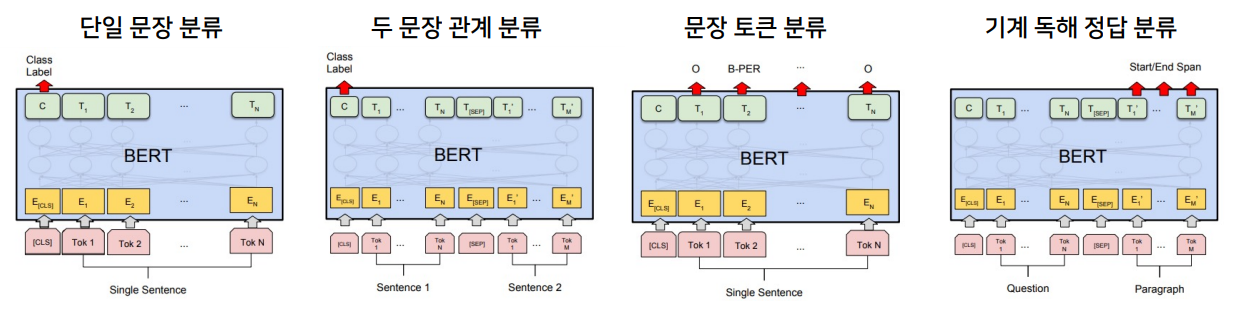

### 2. BERT 모델의 응용

* 감성 분석
  * 입력된 문장에 대해 문장이 긍정인지 부정인지 분류하는 task
  * 네이버 영화 리뷰 코퍼스 (https://github.com/e9t/nsmc)로 감성을 분석함
  * 학습 : 150,000 문장 / 평가 : 50,000 문장 (긍정: 1, 부정: 0)

  * 네이버 영화 리뷰 코퍼스 기준을 accuracy가 91정도 되어야 SOTA model에 근접함

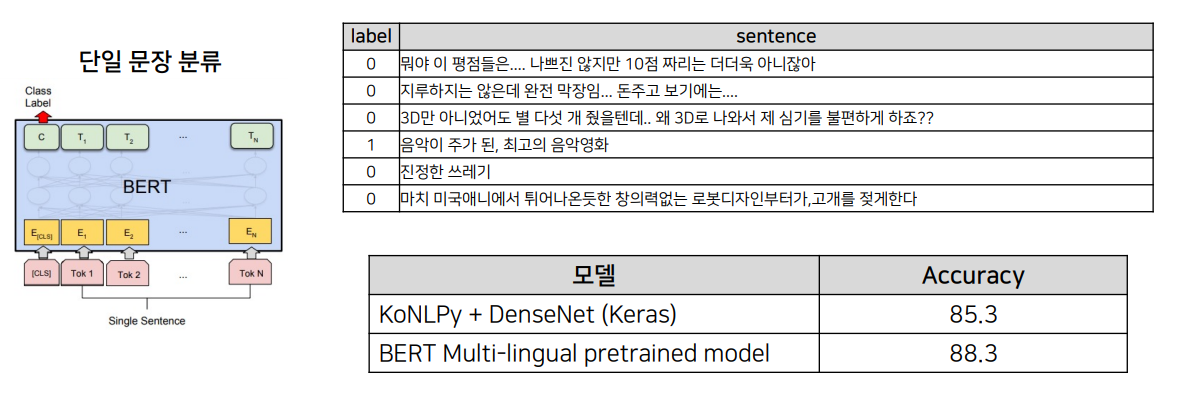

* 관계 추출
  * 문장 내에서 존재하는 지식 정보를 추출함
  * entity : 관계 추출의 대상
  * 문장 내의 subject와 object의 관계를 구함
  * KAIST가 구축한 Silver data 사용 (1명의 전문가가 annotation)
  * 학습: 985,806 문장 / 평가: 100,001 문장
  * 총 81개 label (관계 없음 포함)

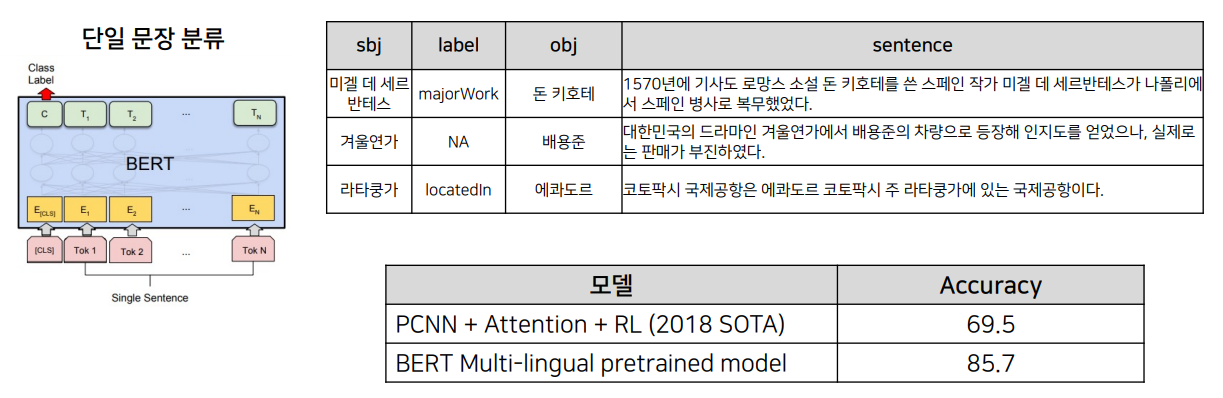

* 의미 비교
  * 두 문장이 의미적으로 같은지 다른지를 비교함
  * 디지털 동반자 패러프레이징 질의 문장 데이터를 이용하여 질문-질문 데이터 생성 및 학습
  * 학습: 3,401 문장 쌍 (유사 X: 1,700개, 유사 O: 1,701개)
  * 평가: 1,001 문장 쌍 (유사 X: 500개, 유사 O: 501개)
  * 문제가 있음
    * sentence1과 sentence2의 주제 관련성이 없음
      * 데이터 설계부터 잘못되었음
    * 실제로 분류해야하는 문장은 의미가 유사함
      * 전혀 관련이 없는 문장들로 학습한 모델은 사용할 수 없음
      * 분류 모델 : 문장 vector가 유사한 존재를 분류하는 목적을 가짐

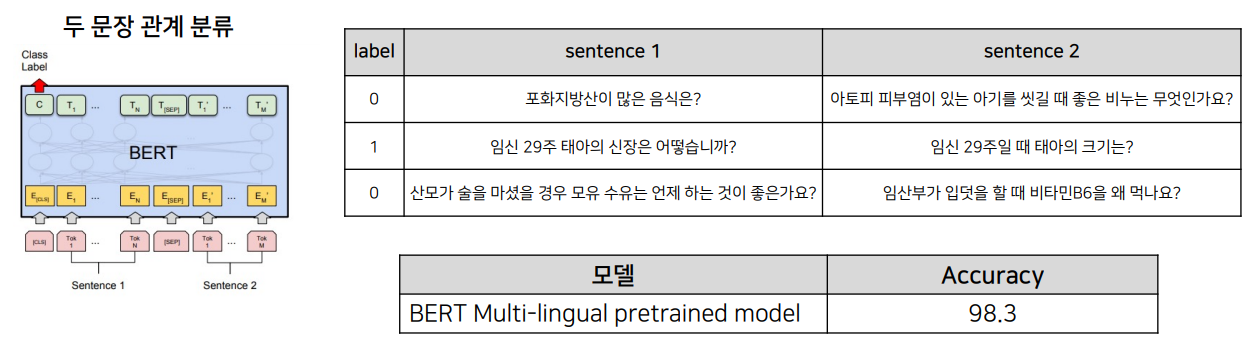

* 개체명 분석
  * ETRI 개체명 인식 데이터를 활용하여 학습 및 평가 진행 (정보통신단체표준 TTA.KO-10.0852)
  * 학습: 95,787 문장 / 평가: 10,503 문장

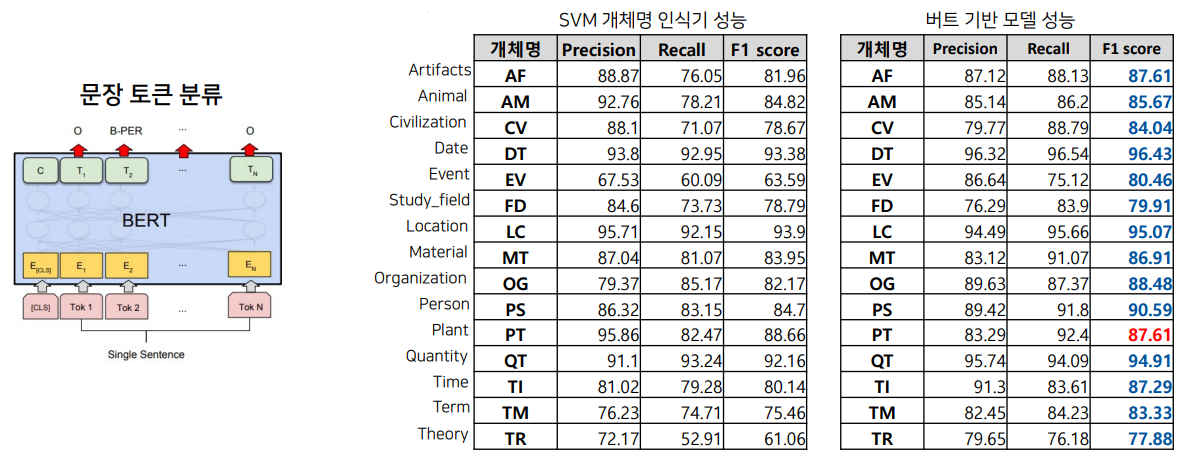

* 기계 독해
  * LG CNS가 공개한 한국어 QA 데이터 셋, KorQuAD (https://korquad.github.io/)
    * 유일하게 한국에서 리더보드를 가지고 있음(KLUE 제외)
    * 성능비교할 때 적절함
  * Wikipedia article에 대해 10,645 건의 문단과 66,181 개의 질의응답 (Training set 60,407 개, Dev set 5,774 개)

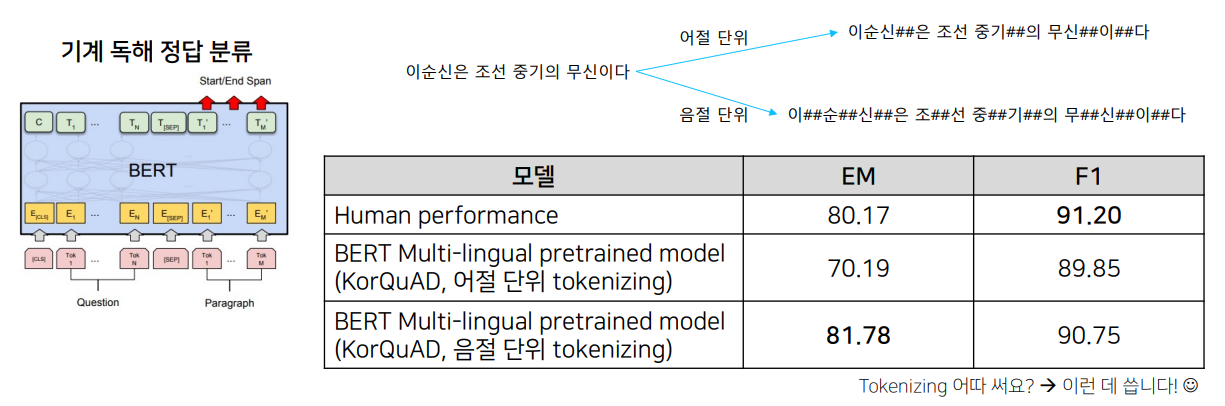

### 3. 한국어 BERT 모델
* 대표 model(2가지)
  * ETRI KoBERT
  * SKT KoBERT

* ETRI KoBERT의 tokenizing
  * 형태소 단위로 분리 후 WordPiece tokenizer 사용함
    * ETRI 형태소 분석기를 사용해야함
  * 한국어에 특화됨

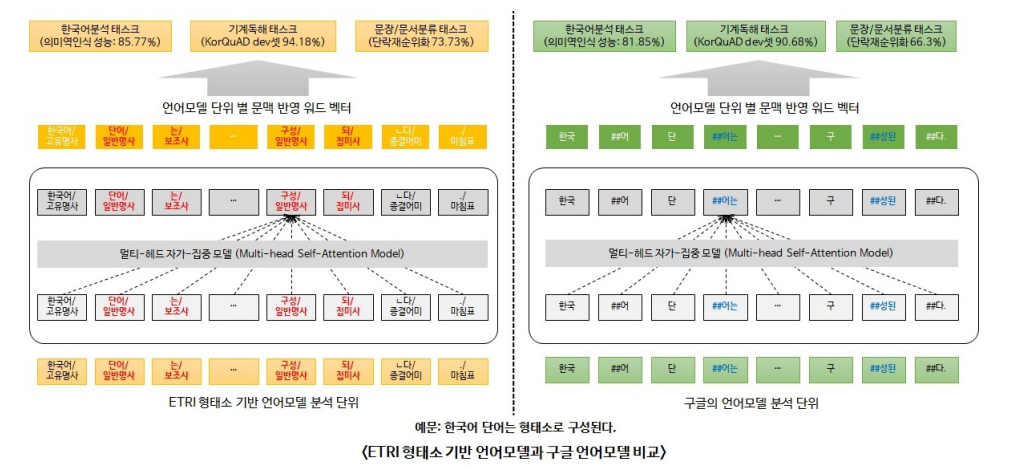

* 한국어 tokenizing에 따른 성능 비교 (https://arxiv.org/abs/2010.02534)

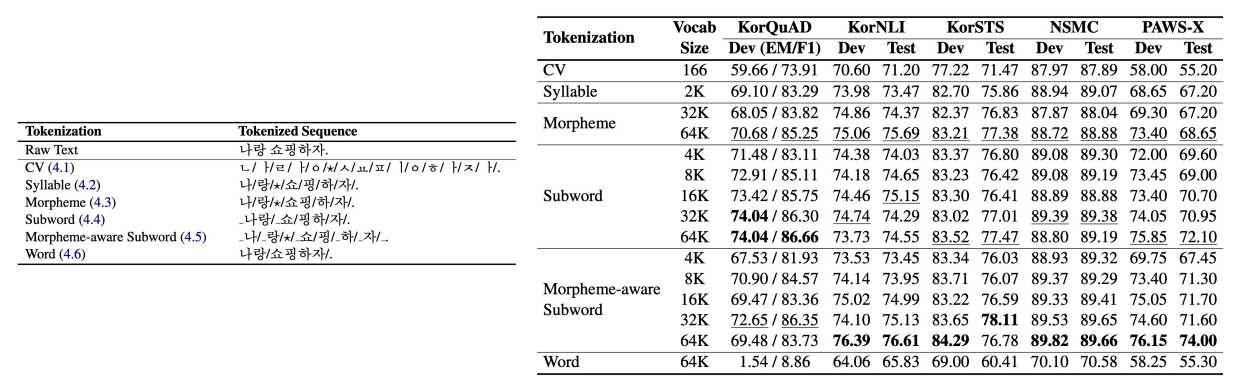

* Advanced BERT model
  * KBQA에서 가장 중요한 entity 정보가 기존 BERT에는 존재하지 않음
  * Entity linking을 통한 주요 entity 추출 및 entity tag 부착
  * BERT embedding layer에 Entity embedding layer를 추가함

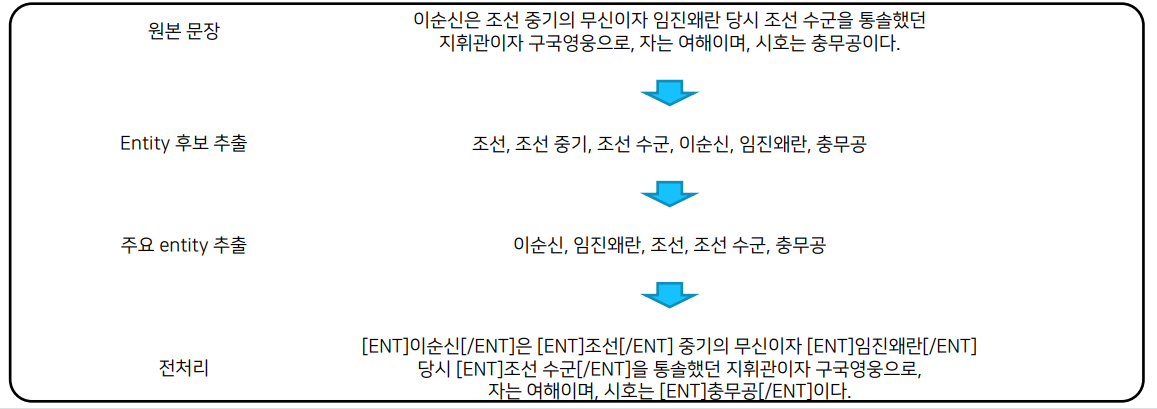

* Advanced BERT Model
  * 형태소 분석을 통해 NNP와 entity 우선 chunking masking

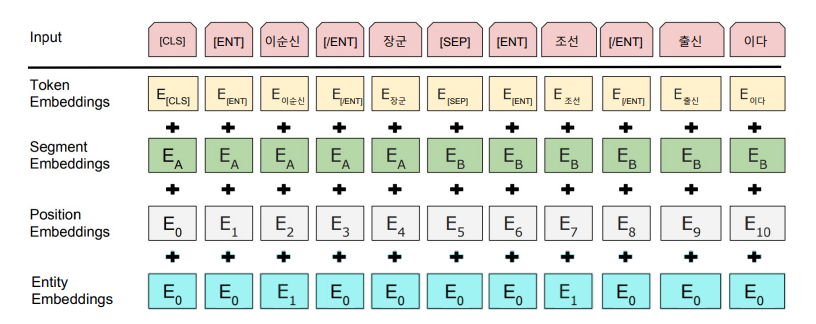

* Advanced BERT model
  * 학습 데이터: 2019년 6월 20일 Wiki dump (약, 4,700만 어절)
  * Batch: 128
  * Sequence length: 512
  * Training steps: 300,000 (대략 10 epochs)


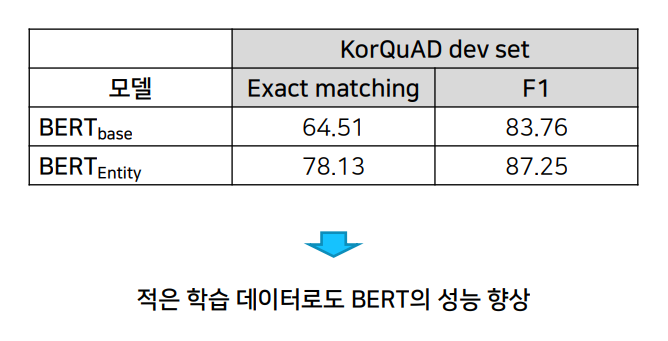